In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math

In [2]:
# Linear Interpolation Function
def interpolating_function(x, y):
    N = len(x)

    def g(x_new):
        # Handle extrapolation BEFORE the first point
        if x_new < x[0]:
            k = 0
            a = (y[k+1] - y[k]) / (x[k+1] - x[k])
            b = y[k]
            y_new = a * (x_new - x[k]) + b
            return y_new
        
        # Handle extrapolation AFTER the last point
        if x_new > x[-1]:
            k = N - 2  # Use the last interval
            a = (y[k+1] - y[k]) / (x[k+1] - x[k])
            b = y[k]
            y_new = a * (x_new - x[k]) + b
            return y_new
        
        # Handle interpolation (within the range)
        for i in range(N-1):
            if x_new >= x[i] and x_new <= x[i+1]:
                k = i
                a = (y[k+1] - y[k]) / (x[k+1] - x[k])
                b = y[k]
                y_new = a * (x_new - x[k]) + b
                return y_new

    return g

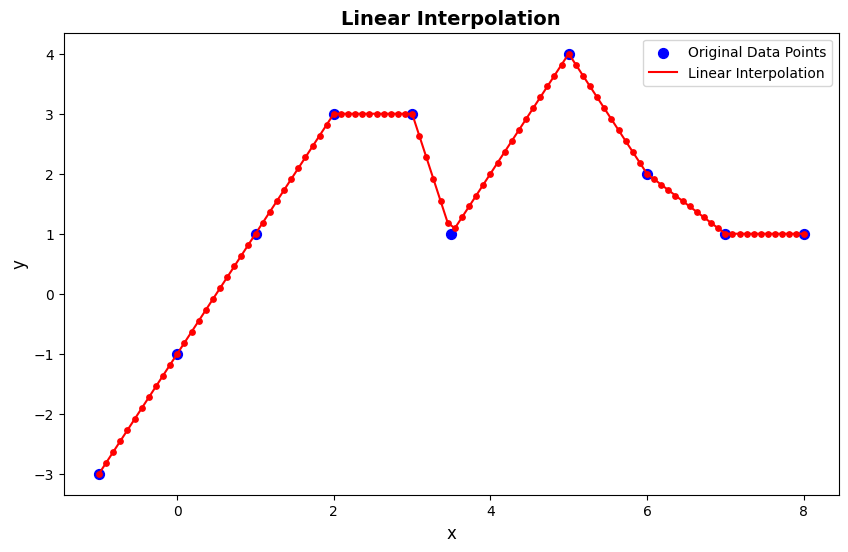

In [3]:
x = [-1,0,1,2,3,3.5,5,6,7,8]
y = [-3,-1,1,3,3,1,4,2,1,1]

g = interpolating_function(x,y)

x_new = np.linspace(min(x), max(x), 10*len(x))  
y_new = [g(xi) for xi in x_new]

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new , s=15, color='red')
plt.plot(x_new, y_new,color='red',label='Linear Interpolation')  

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Interpolation', fontsize=14, fontweight='bold')
plt.legend()

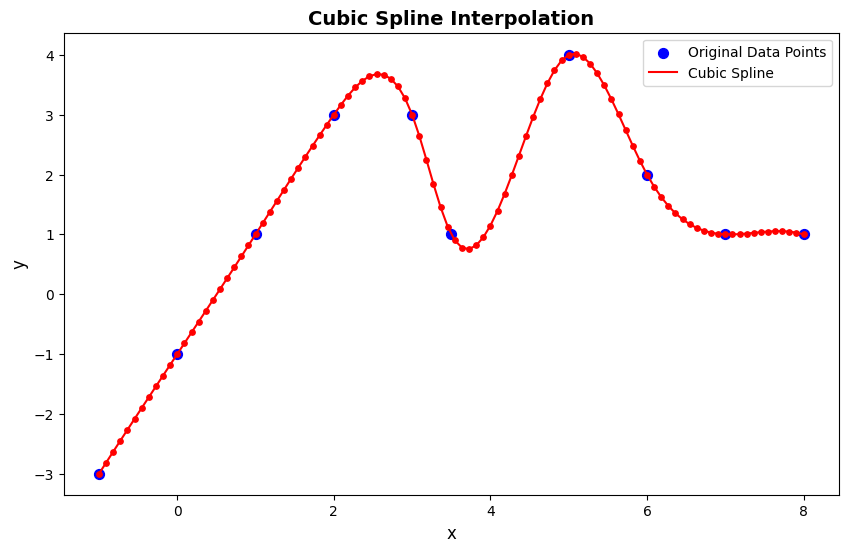

In [4]:
cs = CubicSpline(x, y)
y_new_cs= cs(x_new)

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new_cs , s=15, color='red')
plt.plot(x_new, y_new_cs, label='Cubic Spline',color='red')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Cubic Spline Interpolation', fontsize=14, fontweight='bold')
plt.legend()

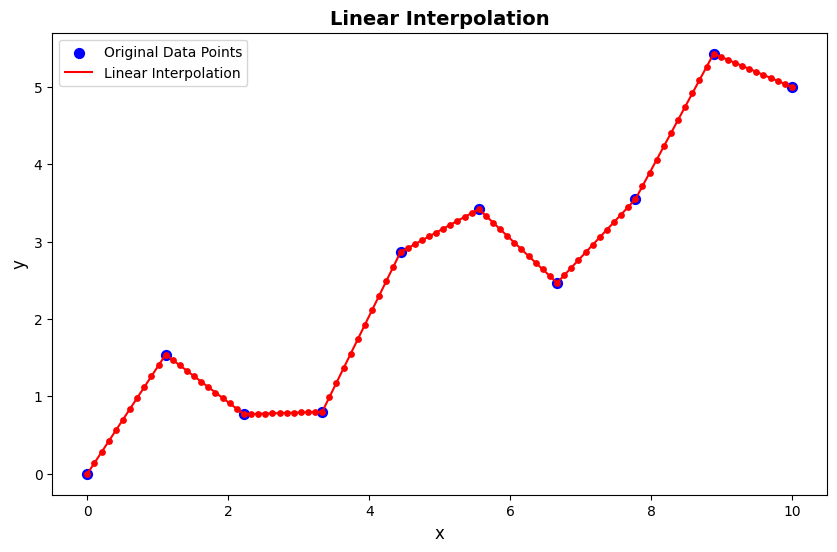

In [5]:
def func(x):
    y = np.sin((np.pi/2)* x ) + x/2
    return y

x = np.linspace(0,10,10)
y = func(x)
g = interpolating_function(x,y)
x_new = np.linspace(0,10,100)
y_new = [g(xi) for xi in x_new]


plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new , s=15, color='red')
plt.plot(x_new, y_new, label='Linear Interpolation', color='red')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Interpolation', fontsize=14, fontweight='bold')
plt.legend()

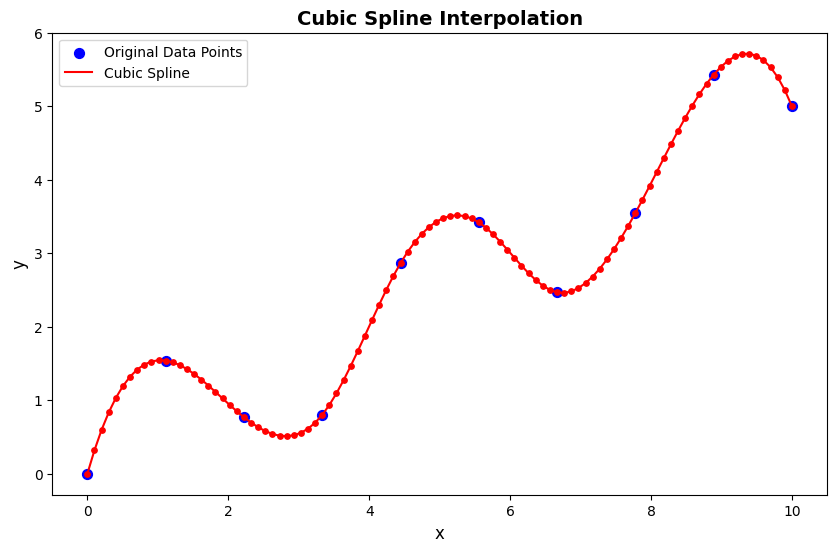

In [6]:
cs = CubicSpline(x, y)
y_new_cs= cs(x_new)

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new_cs , s=15, color='red')
plt.plot(x_new, y_new_cs, label='Cubic Spline',color='red')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Cubic Spline Interpolation', fontsize=14, fontweight='bold')
plt.legend()

/var/folders/z0/1782mm6s5f3_d0q0lnpt5vk40000gn/T/ipykernel_59260/1324120612.py:6: RuntimeWarning: invalid value encountered in divide
  no_err = ((y-y)/y)
/var/folders/z0/1782mm6s5f3_d0q0lnpt5vk40000gn/T/ipykernel_59260/1324120612.py:7: RuntimeWarning: invalid value encountered in divide
  rel_err = ((y - y_new) / y)
/var/folders/z0/1782mm6s5f3_d0q0lnpt5vk40000gn/T/ipykernel_59260/1324120612.py:8: RuntimeWarning: invalid value encountered in divide
  rel_err_cs = ((y - y_new_cs) / y)


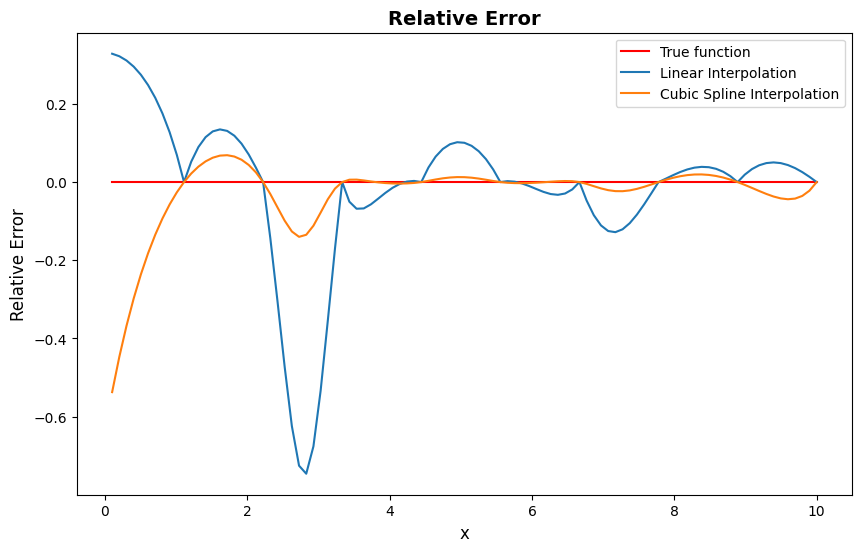

In [7]:
#RELATIVE ERROR

x=np.linspace(0,10,100)
y=func(x)

no_err = ((y-y)/y)
rel_err = ((y - y_new) / y)
rel_err_cs = ((y - y_new_cs) / y)

plt.figure(figsize=(10,6))
plt.title('Relative Error', fontsize=14, fontweight='bold')
plt.plot(x,no_err, color='red',label="True function")
plt.plot(x,rel_err,label='Linear Interpolation')
plt.plot(x,rel_err_cs,label='Cubic Spline Interpolation')
plt.xlabel('x', fontsize=12)
plt.ylabel('Relative Error', fontsize=12)
plt.legend()


In [8]:
 #Simple Harmonic Motion :

 def func_x(t, A=1, omega=1):
    x = A*np.cos(omega*t)
    return x

def func_v(t, A=1, omega=1):
    v = - A*omega*np.sin(omega*t)
    return v


In [9]:
t=np.linspace(0,10,10)
x=func_x(t)
v=func_v(t)

t_new = np.linspace(0,10,1000) #new time grid for interpolation

x_true = func_x(t_new)
v_true = func_v(t_new)

E_true = 0.5*x_true**2 + 0.5*v_true**2

print("True mean energy: ", np.mean(E_true), "Energy std dev: ", np.std(E_true))


True mean energy:  0.5 Energy std dev:  3.435418271361579e-17


In [10]:
# Linear Interpolation

g=interpolating_function(t,x)
x_new = [g(xi) for xi in t_new]
v_new = np.gradient(x_new, t_new)

# Calculating Energy

x_new = np.array(x_new)
v_new = np.array(v_new)

E_new = 0.5*x_new**2 + 0.5*v_new**2

print("Linear Interpolation")
print("Mean energy: ", np.mean(E_new), "Energy std dev: ", np.std(E_new))


Linear Interpolation
Mean energy:  0.4246993467541022 Energy std dev:  0.10359925944999467


In [11]:
# Cubic Spline Interpolation

cs = CubicSpline(t, x)
x_new_cs = cs(t_new)
v_new_cs= np.gradient(x_new_cs, t_new)

E_new_cs = 0.5*x_new_cs**2 + 0.5*v_new_cs**2

print("Cubic Spline Interpolation")
print("Mean energy: ", np.mean(E_new_cs), "Energy std dev: ", np.std(E_new_cs))


Cubic Spline Interpolation
Mean energy:  0.5043841685460996 Energy std dev:  0.02007863813777881


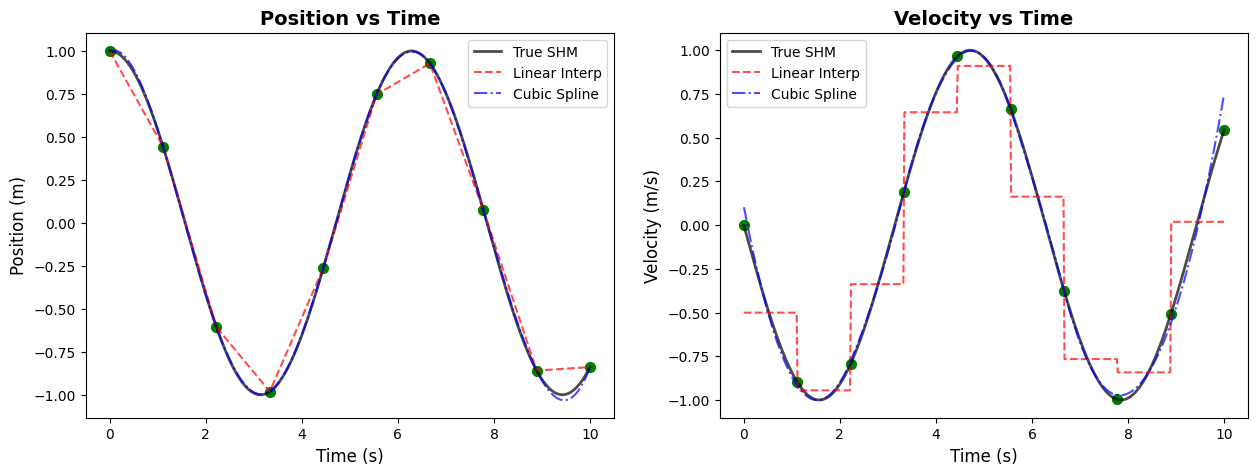

In [12]:
# Position vs Time and Velocity vs Time

fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(t_new, x_true, 'k-', linewidth=2, label='True SHM',alpha=0.7)
axes[0].plot(t_new, x_new, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[0].plot(t_new, x_new_cs, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[0].scatter(t,x, s=50, c='green')
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Position (m)', fontsize=12)
axes[0].set_title('Position vs Time', fontsize=14, fontweight='bold')
axes[0].legend()

axes[1].plot(t_new, v_true, 'k-', linewidth=2, label='True SHM',alpha=0.7)
axes[1].plot(t_new, v_new, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[1].plot(t_new, v_new_cs, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[1].scatter(t,v, s=50, c='green')
axes[1].set_xlabel('Time (s)', fontsize=12)
axes[1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[1].set_title('Velocity vs Time', fontsize=14, fontweight='bold')
axes[1].legend()

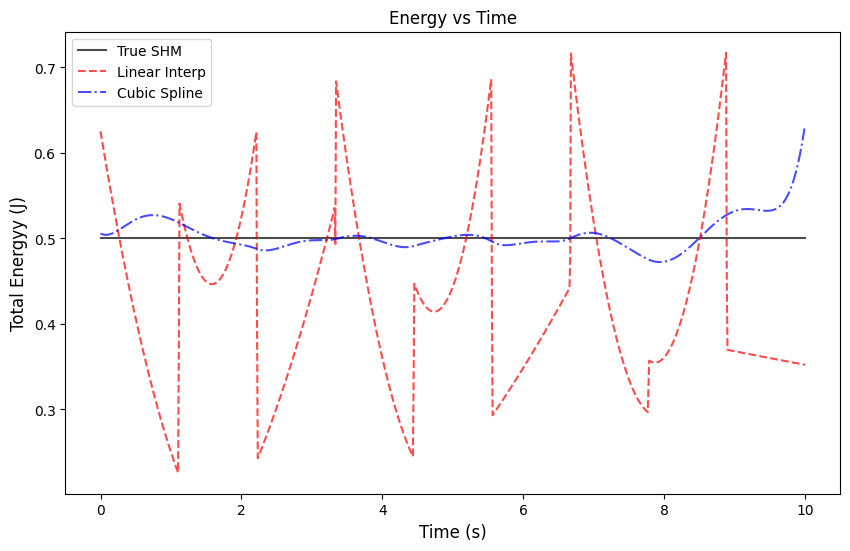

In [13]:
# Energy vs Time    

plt.figure(figsize=(10,6))
plt.plot(t_new, E_true, 'k-', label='True SHM',alpha=0.7)
plt.plot(t_new, E_new, 'r--', label='Linear Interp', alpha=0.7)
plt.plot(t_new, E_new_cs, 'b-.', label='Cubic Spline', alpha=0.7)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Total Energyy (J)', fontsize=12)
plt.title("Energy vs Time")
plt.legend()


Maximum relative energy errors:
Linear interpolation: 54.80%
Cubic spline: 25.54%


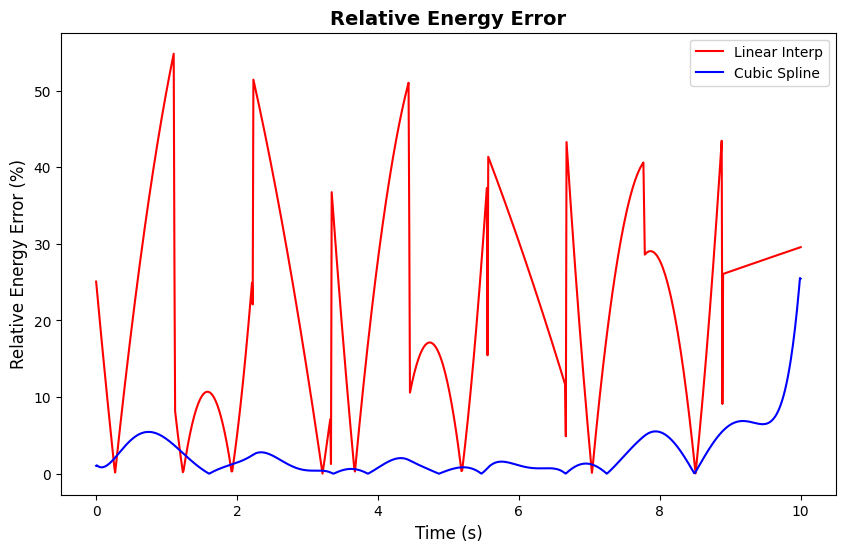

In [14]:
# Calculating relative energy errors

rel_error_linear = np.abs((E_new - E_true[0]) / E_true[0]) * 100
rel_error_spline = np.abs((E_new_cs - E_true[0]) / E_true[0]) * 100

plt.figure(figsize=(10,6))

# Relative energy error
plt.plot(t_new, rel_error_linear, 'r-',label='Linear Interp')
plt.plot(t_new, rel_error_spline, 'b-',label='Cubic Spline')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Relative Energy Error (%)', fontsize=12)
plt.title('Relative Energy Error', fontsize=14, fontweight='bold')
plt.legend()

print(f"\nMaximum relative energy errors:")
print(f"Linear interpolation: {np.max(rel_error_linear):.2f}%")
print(f"Cubic spline: {np.max(rel_error_spline):.2f}%")